In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder

from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense , BatchNormalization
from tensorflow.keras import callbacks
# from tensorflow.keras.callbacks import EarlyStopping


from sklearn.metrics import precision_score , recall_score , accuracy_score , confusion_matrix , classification_report , f1_score

import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv(r"C:\Users\PC\Downloads\archive (15)\Heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [13]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.837237,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.900919,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [14]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

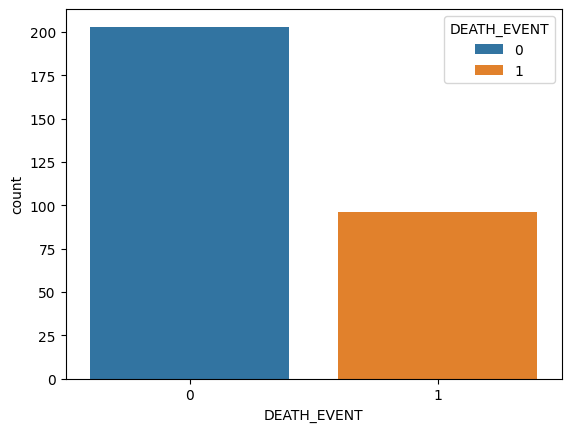

In [17]:
sns.countplot(x=df["DEATH_EVENT"],hue=df["DEATH_EVENT"],palette="tab10")

<Axes: >

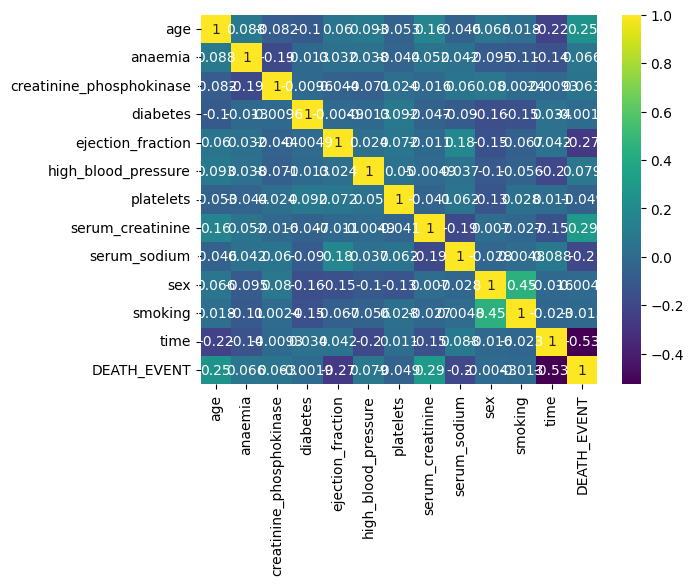

In [27]:
plt.Figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [28]:
X = df.drop("DEATH_EVENT" , axis=1)
y = df["DEATH_EVENT"]

In [29]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [30]:
cols_named = list(X.columns)
standard_scalars = StandardScaler()
x_scale = standard_scalars.fit_transform(X)
X_scaled = pd.DataFrame(x_scale , columns=cols_named)

In [31]:
X_scaled

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192051,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491309,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350371,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912148,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350371,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.097867,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.491309,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.332988,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.332988,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


In [32]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y,test_size=0.2,stratify=y,random_state=40)

In [34]:
print(f"Num of X_train : {X_train.shape}")
print(f"Num of X_test : {X_test.shape}")
print(f"Num of y_train : {y_train.shape}")
print(f"Num of y_test : {y_test.shape}")

Num of X_train : (239, 12)
Num of X_test : (60, 12)
Num of y_train : (239,)
Num of y_test : (60,)


In [35]:
model1 = SVC()
model1.fit(X_train,y_train)

SVC()

In [36]:
model1.score(X_train,y_train)

0.9079497907949791

In [37]:
model1.score(X_test,y_test)

0.8666666666666667

In [38]:
y_pred = model1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        41
           1       0.92      0.63      0.75        19

    accuracy                           0.87        60
   macro avg       0.89      0.80      0.83        60
weighted avg       0.87      0.87      0.86        60



<Axes: >

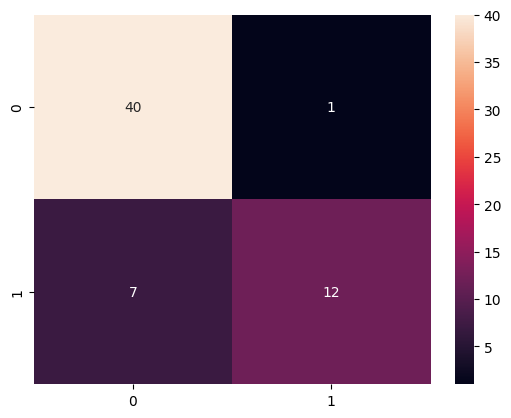

In [40]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix,annot=True)

In [42]:
# loss
# old delta = 0.111
# new delta = 0.111
# loss(delta) = old delta - new delta = 0.111 - 0.111 = 0.001 (improve)
early_stopping = callbacks.EarlyStopping(patience=5 , min_delta= 0.001 , restore_best_weights=True)

In [43]:
model = Sequential()
# input layer + first hidden layer
model.add(Dense(10,activation='relu',input_dim = 12))    # input_shape = (12,)
# second hidden layer
model.add(Dense(8,activation='relu'))
# output layer
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227 (908.00 B)

 Trainable params: 227 (908.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
history_1 = model.fit(X_train,y_train,epochs=100 , batch_size = 30,callbacks=[early_stopping],validation_split=0.1,verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8073 - loss: 0.4099 - val_accuracy: 0.7083 - val_loss: 0.5562
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8134 - loss: 0.4195 - val_accuracy: 0.7083 - val_loss: 0.5579
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8364 - loss: 0.3752 - val_accuracy: 0.7083 - val_loss: 0.5610
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8133 - loss: 0.4076 - val_accuracy: 0.7083 - val_loss: 0.5612
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8033 - loss: 0.4260 - val_accuracy: 0.7083 - val_loss: 0.5610
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7960 - loss: 0.4227 - val_accuracy: 0.7083 - val_loss: 0.5620


In [52]:
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras import regularizers

In [54]:
early_stopping = callbacks.EarlyStopping(patience=10 , min_delta= 0.001 , restore_best_weights=True)

model = Sequential()
# input layer + first hidden layer(l1 regularizer)
model.add(Dense(64,activation='relu',input_shape = (12,),kernel_regularizer=regularizers.l1(0.001),kernel_initializer=GlorotUniform(seed=42)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# second hidden layer(l2 regularizer)
model.add(Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.001),kernel_initializer=GlorotUniform(seed=42)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third hidden layer ((l1 and l2 regularizer))
# Bias regularization (l2 = 0.001) --> Bias penalty
# Activity regularization (l2 = 0.001) --> Activation penalty
# impact(Kernal regularization > Activity regularization > Bias regularization)
model.add(Dense(16,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),bias_regularizer=regularizers.l2(0.001),activity_regularizer=regularizers.l2(0.001),kernel_initializer=GlorotUniform(seed=42)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer 
model.add(Dense(1,activation='sigmoid'))

In [55]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,681 (14.38 KB)

 Non-trainable params: 224 (896.00 B)

In [58]:
history_2 = model.fit(X_train,y_train,epochs=100 , batch_size = 30,callbacks=[early_stopping],validation_split=0.1,verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4380 - loss: 1.6845 - val_accuracy: 0.7500 - val_loss: 0.8434
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4316 - loss: 1.5993 - val_accuracy: 0.7917 - val_loss: 0.8620
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4557 - loss: 1.5870 - val_accuracy: 0.7917 - val_loss: 0.8829
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5496 - loss: 1.4006 - val_accuracy: 0.7083 - val_loss: 0.9007
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6330 - loss: 1.3222 - val_accuracy: 0.6667 - val_loss: 0.9150
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6672 - loss: 1.2388 - val_accuracy: 0.5417 - val_loss: 0.9290
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6783 - loss: 1.1801 - val_accuracy: 0.5417 - val_loss: 0.9424
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5942 - loss: 1.2882 - val_accuracy: 0.5000 - val_loss:

In [59]:
model.save("model.h5")

In [60]:
from tensorflow.keras.models import load_model
h2 = load_model("model.h5")